In [4]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

HH4B_DIR = "/home/users/woodson/HH4b/"
plot_dir = Path(f"{HH4B_DIR}/plots/Scaling_Toys/FoM_Update")

xbb_cuts = np.arange(0.8, 0.999, 0.0025)
bdt_cuts_data = np.arange(0.9, 0.999, 0.0025)
# bdt_cuts = np.array([0.975])
bdt_cuts = bdt_cuts_data
method = "3dkde"
ntoys = 100
optimize = False
restrict = True
optimize_str_data = f"{xbb_cuts[0]:.4f}_{xbb_cuts[-1]:.4f}_{xbb_cuts[1]-xbb_cuts[0]:.4f}_{bdt_cuts_data[0]:.4f}_{bdt_cuts_data[-1]:.4f}_{bdt_cuts_data[1]-bdt_cuts_data[0]:.4f}"
if optimize:
    if len(bdt_cuts) > 1:
        optimize_str = f"{xbb_cuts[0]:.4f}_{xbb_cuts[-1]:.4f}_{xbb_cuts[1]-xbb_cuts[0]:.4f}_{bdt_cuts[0]:.4f}_{bdt_cuts[-1]:.4f}_{bdt_cuts[1]-bdt_cuts[0]:.4f}"
    else:
        optimize_str = (
            f"{xbb_cuts[0]:.4f}_{xbb_cuts[-1]:.4f}_{xbb_cuts[1]-xbb_cuts[0]:.4f}_{bdt_cuts[0]:.4f}"
        )
else:
    optimize_str = "noopt"
if not restrict:
    optimize_str += "_norest"

fom_toys = {}
s_toys = {}
b_toys = {}
xbb_cut_toys = {}
bdt_cut_toys = {}
fom_orig = {}
for lumi_scale in [1, 138.0 / 62.0, 62.0 / 138.0]:
    ls = str(lumi_scale)
    with open(
        plot_dir / f"fom_toys_{method}_{ntoys}_{lumi_scale:4f}_{optimize_str}.pkl",
        "rb",
    ) as f:
        data = pickle.load(f)
        fom_toys[ls] = np.array(data["fom_toys"])
        s_toys[ls] = np.array(data["s_toys"])
        b_toys[ls] = np.array(data["b_toys"])
        fom_orig[ls] = 2 * np.sqrt(b_toys[ls]) / s_toys[ls]
        xbb_cut_toys[ls] = np.array(data["xbb_cut_toys"])
        bdt_cut_toys[ls] = np.array(data["bdt_cut_toys"])

with open(
    plot_dir / f"fom_data_{optimize_str_data}.pkl",
    "rb",
) as f:
    data = pickle.load(f)
    fom_data = data["fom_data"]

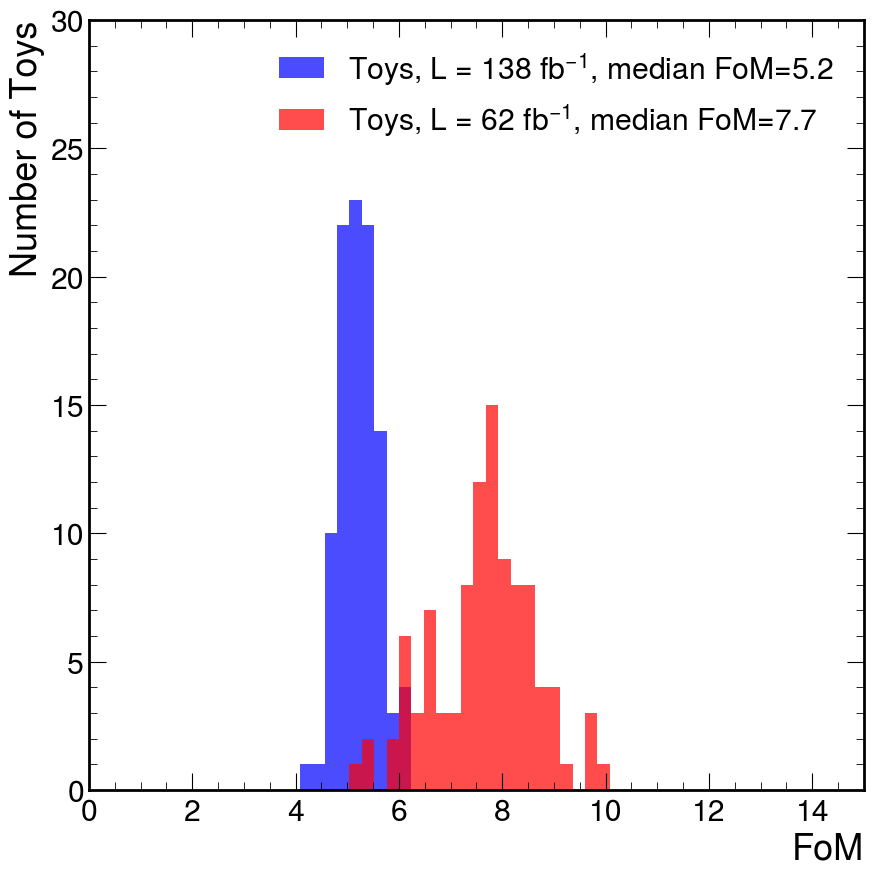

In [16]:
plt.figure()
plt.hist(
    fom_toys[str(138.0 / 62.0)],
    bins=np.linspace(0, 12, 51),
    alpha=0.7,
    label=f"Toys, L = 138 fb$^{{-1}}$, median FoM={np.median(fom_toys[str(138.0 / 62.0)]):.1f}",
    color="blue",
)
plt.hist(
    fom_toys[str(1)],
    bins=np.linspace(0, 12, 51),
    alpha=0.7,
    label=f"Toys, L = 62 fb$^{{-1}}$, median FoM={np.median(fom_toys[str(1)]):.1f}",
    color="red",
)
# plt.hist(
#     fom_toys[str(62.0/138.0)],
#    bins=np.linspace(0, 12, 51),
#    alpha=0.7,
#    label=f"Toys, L=28/fb, median FoM={np.median(fom_toys[str(62.0/138.0)]):.1f}",
#    color="green",
# )
# plt.axvline(
#    fom_data,
#    ymin=0,
#    ymax=0.75,
#    color="black",
#    linestyle="--",
#    label=f"Data, L=62/fb, FoM={fom_data:.1f}",
# )
plt.xlabel(r"FoM")
plt.ylabel("Number of Toys")
# set x-axis limits
plt.xlim(0, 15)
# get current axes and set y-axis limits
plt.ylim(0, 30)
plt.legend()
plt.show()

0.1676


(0.0, 2.0)

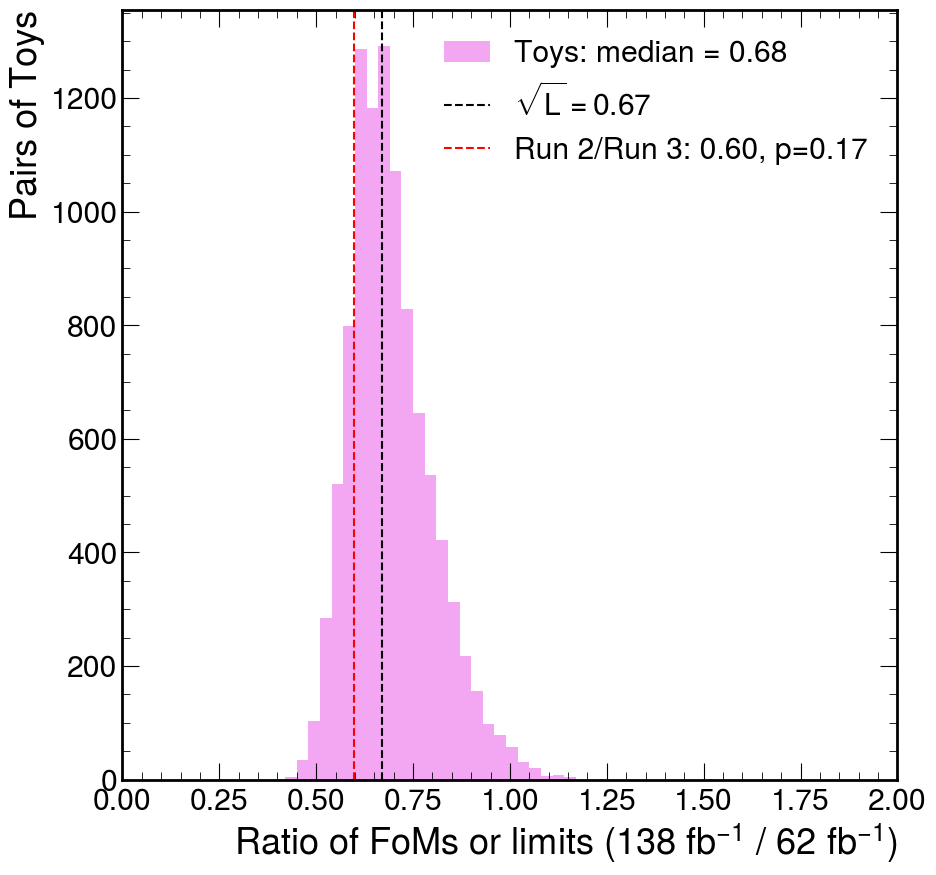

In [23]:
enhance_factor = 1
outer = np.outer(fom_toys[str(138 / 62)], 1 / fom_toys[str(1)]).flatten() * enhance_factor

plt.figure()
plt.hist(
    # fom_toys[str(138 / 62)] / fom_toys[str(1)],
    outer,
    bins=np.linspace(0, 1.5, 51),
    alpha=0.7,
    label=f"Toys: median = {np.median(fom_toys[str(138/62)]/fom_toys[str(1)]):.2f}",
    color="violet",
)
plt.axvline(
    np.sqrt(62 / 138),
    color="black",
    linestyle="--",
    label=r"$\sqrt{L} = 0.67$",
)
# left sided p-value
# pval = np.sum(fom_toys[str(138 / 62)] / fom_toys[str(1)] < 5.5 / 9.2) / len(fom_toys)
pval = np.sum(outer < 5.5 / 9.2) / len(outer)
print(pval)
plt.axvline(
    5.5 / 9.2,
    color="red",
    linestyle="--",
    label=f"Run 2/Run 3: 0.60, p={pval:.2f}",
)
plt.xlabel("Ratio of FoMs or limits (138 fb$^{{-1}}$ / 62 fb$^{{-1}}$)")
plt.legend()
plt.ylabel("Pairs of Toys")
plt.xlim(0, 2)

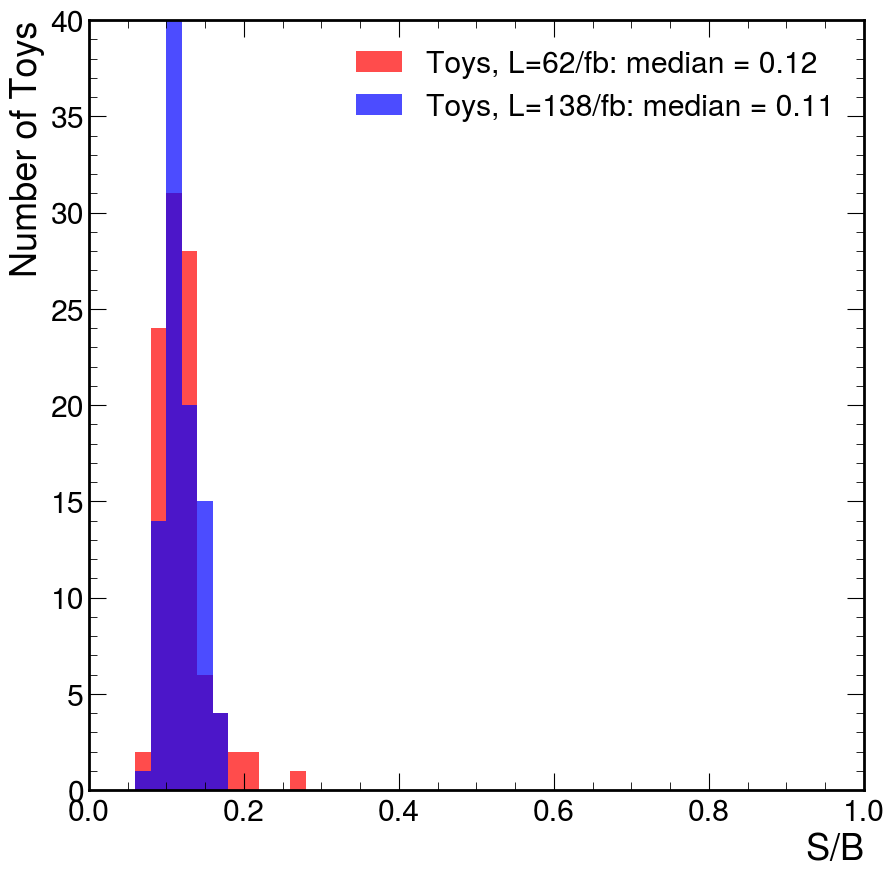

In [22]:
plt.figure()
plt.hist(
    s_toys[str(1)] / b_toys[str(1)],
    bins=np.linspace(0, 1, 51),
    alpha=0.7,
    label=f"Toys, L=62/fb: median = {np.median(s_toys[str(1)]/b_toys[str(1)]):.2f}",
    color="red",
)
plt.hist(
    s_toys[str(138 / 62)] / b_toys[str(138 / 62)],
    bins=np.linspace(0, 1, 51),
    alpha=0.7,
    label=f"Toys, L=138/fb: median = {np.median(s_toys[str(138/62)]/b_toys[str(138/62)]):.2f}",
    color="blue",
)
# plt.hist(
#     s_toys[str(0.5)] / b_toys[str(0.5)],
#     bins=np.linspace(0, 1, 51),
#     alpha=0.7,
#     label=f"Toys, L=31/fb: median = {np.median(s_toys[str(0.5)]/b_toys[str(0.5)]):.2f}",
#     color="green",
# )
plt.legend()
plt.xlabel(r"$S/B$")
plt.ylabel("Number of Toys")
plt.xlim(0, 1)
plt.ylim(0, 40)
plt.show()

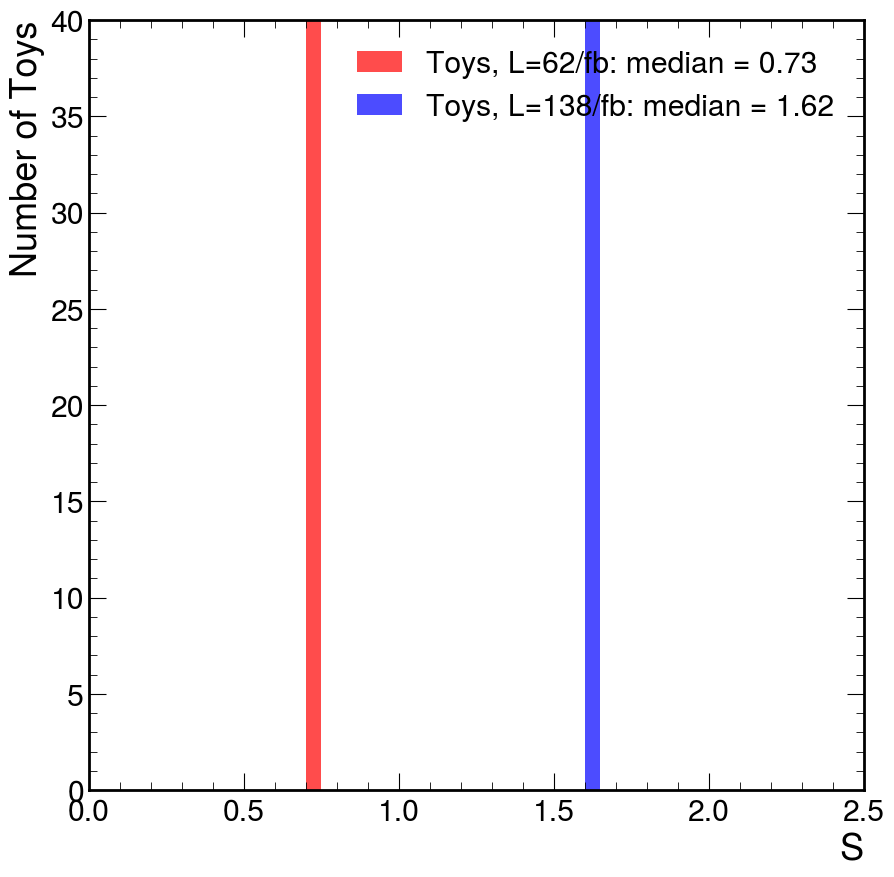

In [23]:
plt.figure()
plt.hist(
    s_toys[str(1)],
    bins=np.linspace(0, 2.5, 51),
    alpha=0.7,
    label=f"Toys, L=62/fb: median = {np.median(s_toys[str(1)]):.2f}",
    color="red",
)
plt.hist(
    s_toys[str(138 / 62)],
    bins=np.linspace(0, 2.5, 51),
    alpha=0.7,
    label=f"Toys, L=138/fb: median = {np.median(s_toys[str(138/62)]):.2f}",
    color="blue",
)
# plt.hist(
#     s_toys[str(0.5)],
#     bins=np.linspace(0, 2.5, 51),
#     alpha=0.7,
#     label=f"Toys, L=31/fb: median = {np.median(s_toys[str(0.5)]):.2f}",
#     color="green",
# )
plt.legend()
plt.xlabel(r"$S$")
plt.ylabel("Number of Toys")
plt.xlim(0, 2.5)
plt.ylim(0, 40)
plt.show()

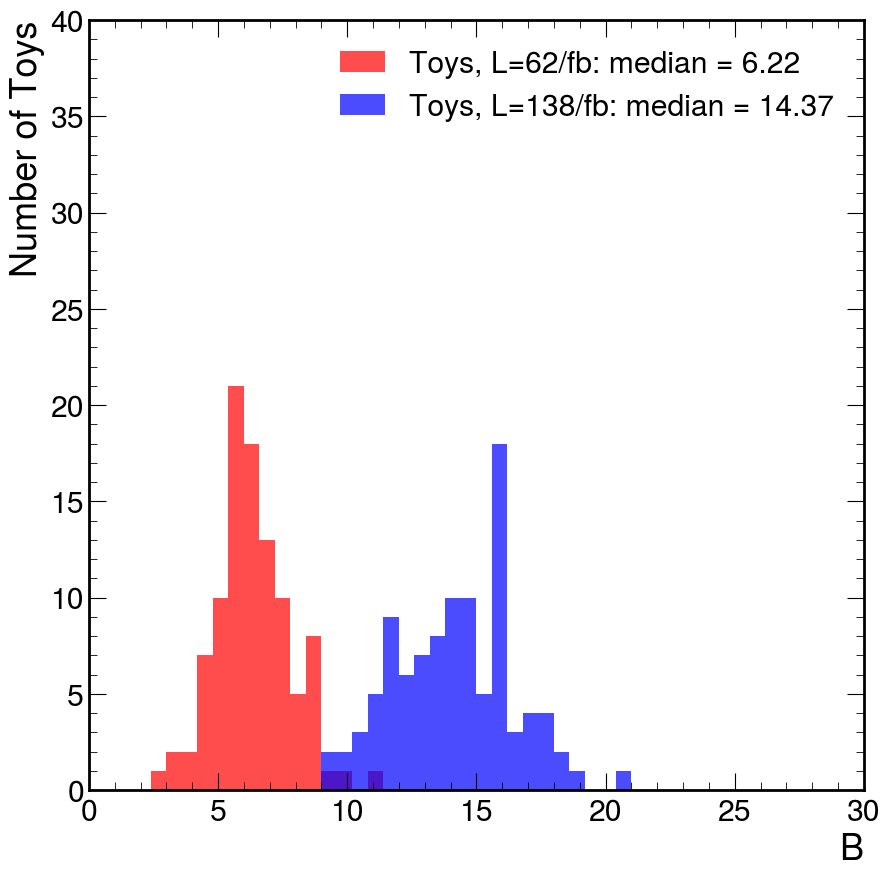

In [24]:
plt.figure()
plt.hist(
    b_toys[str(1)],
    bins=np.linspace(0, 30, 51),
    alpha=0.7,
    label=f"Toys, L=62/fb: median = {np.median(b_toys[str(1)]):.2f}",
    color="red",
)
plt.hist(
    b_toys[str(138 / 62)],
    bins=np.linspace(0, 30, 51),
    alpha=0.7,
    label=f"Toys, L=138/fb: median = {np.median(b_toys[str(138/62)]):.2f}",
    color="blue",
)
# plt.hist(
#     b_toys[str(0.5)],
#     bins=np.linspace(0, 30, 51),
#     alpha=0.7,
#     label=f"Toys, L=31/fb: median = {np.median(b_toys[str(0.5)]):.2f}",
#     color="green",
# )
plt.legend()
plt.xlabel(r"$B$")
plt.ylabel("Number of Toys")
plt.xlim(0, 30)
plt.ylim(0, 40)
plt.show()

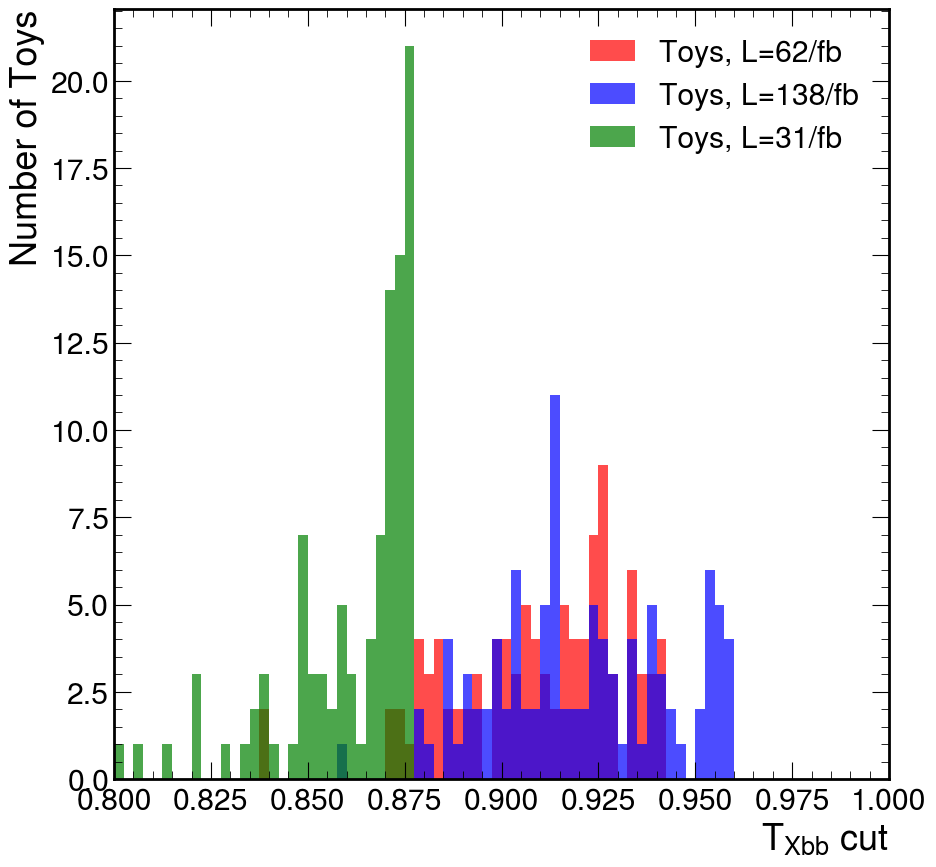

In [10]:
plt.figure()
plt.hist(
    xbb_cut_toys[str(1)],
    bins=np.concatenate((xbb_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=62/fb",
    color="red",
)
plt.hist(
    xbb_cut_toys[str(138 / 62)],
    bins=np.concatenate((xbb_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=138/fb",
    color="blue",
)
plt.hist(
    xbb_cut_toys[str(0.5)],
    bins=np.concatenate((xbb_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=31/fb",
    color="green",
)
plt.legend()
plt.xlabel(r"$T_{Xbb}$ cut")
plt.ylabel("Number of Toys")
plt.xlim(np.min(xbb_cuts), 1)
plt.show()

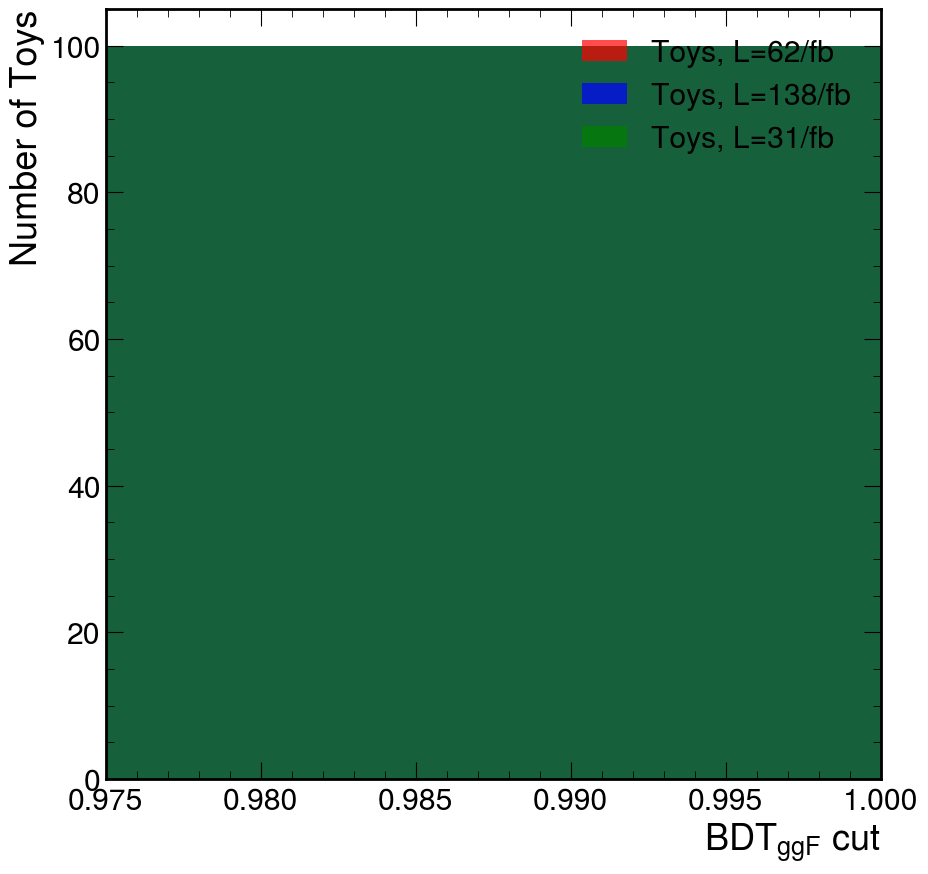

In [12]:
plt.figure()
plt.hist(
    bdt_cut_toys[str(1)],
    bins=np.concatenate((bdt_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=62/fb",
    color="red",
)
plt.hist(
    bdt_cut_toys[str(138 / 62)],
    bins=np.concatenate((bdt_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=138/fb",
    color="blue",
)
plt.hist(
    bdt_cut_toys[str(0.5)],
    bins=np.concatenate((bdt_cuts, [1])),
    alpha=0.7,
    label=f"Toys, L=31/fb",
    color="green",
)
plt.legend()
plt.xlabel(r"$BDT_{ggF}$ cut")
plt.ylabel("Number of Toys")
plt.xlim(np.min(bdt_cuts), 1)
plt.show()

In [31]:
import hist


def make_histograms(mass_array, xbb_array, bdt_array):
    mass_axis = hist.axis.Regular(16, 60, 220, name="mass")
    bdt_bins = 100
    bdt_axis = hist.axis.Regular(bdt_bins, 0, 1, name="bdt")
    xbb_bins = 100
    xbb_axis = hist.axis.Regular(xbb_bins, 0, 1, name="xbb")

    # mask = (mass_array > 150) | (mass_array < 110)
    mask = mass_array > 0  # no masking for now

    h_mass = hist.Hist(mass_axis)
    h_mass.fill(mass_array[mask])
    h_xbb = hist.Hist(xbb_axis)
    h_xbb.fill(xbb_array[mask])
    h_bdt = hist.Hist(bdt_axis)
    h_bdt.fill(bdt_array[mask])

    # sample toys from 3D distribution
    h_mass_xbb_bdt = hist.Hist(mass_axis, xbb_axis, bdt_axis)
    h_mass_xbb_bdt.fill(
        mass=mass_array[mask],
        xbb=xbb_array[mask],
        bdt=bdt_array[mask],
    )

    # make 2D histograms
    h_mass_xbb = hist.Hist(mass_axis, xbb_axis)
    h_mass_xbb.fill(
        mass=mass_array[mask],
        xbb=xbb_array[mask],
    )
    h_mass_bdt = hist.Hist(mass_axis, bdt_axis)
    h_mass_bdt.fill(
        mass=mass_array[mask],
        bdt=bdt_array[mask],
    )
    h_xbb_bdt = hist.Hist(xbb_axis, bdt_axis)
    h_xbb_bdt.fill(
        xbb=xbb_array[mask],
        bdt=bdt_array[mask],
    )

    return h_mass, h_xbb, h_bdt, h_mass_xbb, h_mass_bdt, h_xbb_bdt, h_mass_xbb_bdt

In [ ]:
import pickle
from Scaling_Toys import minuit_transform, logit, plot_corner, minuit_inverse_transform, sigmoid
from scipy.stats import gaussian_kde
import numpy as np

HH4B_DIR = "/home/users/woodson/HH4b/"
# open the pickle file
with open(  # noqa: PTH123
    f"{HH4B_DIR}/data/events_combined_25June2ReRunBDTZbbSFs384Check.pkl", "rb"
) as f:
    events_combined = pickle.load(f)
data_array = events_combined["data"][["H2PNetMass", "H2TXbb", "bdt_score"]].to_numpy()

transformed_data_array = np.column_stack(
    (
        minuit_transform(data_array[:, 0], xmin=60, xmax=220),
        logit(data_array[:, 1]),
        logit(data_array[:, 2]),
    )
)
kde_3d_mass_xbb_bdt = gaussian_kde(transformed_data_array.T, bw_method="silverman")
kde_2d_xbb_bdt = gaussian_kde(transformed_data_array[:, 1:].T, bw_method="silverman")
kde_1d_mass = gaussian_kde(transformed_data_array[:, 0], bw_method="silverman")
kde_1d_xbb = gaussian_kde(transformed_data_array[:, 1], bw_method="silverman")
kde_1d_bdt = gaussian_kde(transformed_data_array[:, 2], bw_method="silverman")

integral = len(events_combined["data"])

In [ ]:
n_samples = 10 * int(integral)
rng = np.random.default_rng(42)  # for reproducibility
sampled_transformed_data = kde_3d_mass_xbb_bdt.resample(n_samples, seed=rng).T
mass_toy = minuit_inverse_transform(sampled_transformed_data[:, 0], xmin=60, xmax=220)
xbb_toy = sigmoid(sampled_transformed_data[:, 1])
bdt_toy = sigmoid(sampled_transformed_data[:, 2])

h_mass, h_xbb, h_bdt, h_mass_xbb, h_mass_bdt, h_xbb_bdt, h_mass_xbb_bdt = make_histograms(
    mass_toy,
    xbb_toy,
    bdt_toy,
)

# h_mass, h_xbb, h_bdt, h_mass_xbb, h_mass_bdt, h_xbb_bdt, h_mass_xbb_bdt = make_histograms(
#     events_combined["data"]["H2PNetMass"],
#     events_combined["data"]["H2TXbb"],
#     events_combined["data"]["bdt_score"],
# )

fig = plot_corner(h_mass, h_xbb, h_bdt, h_mass_xbb, h_mass_bdt, h_xbb_bdt)

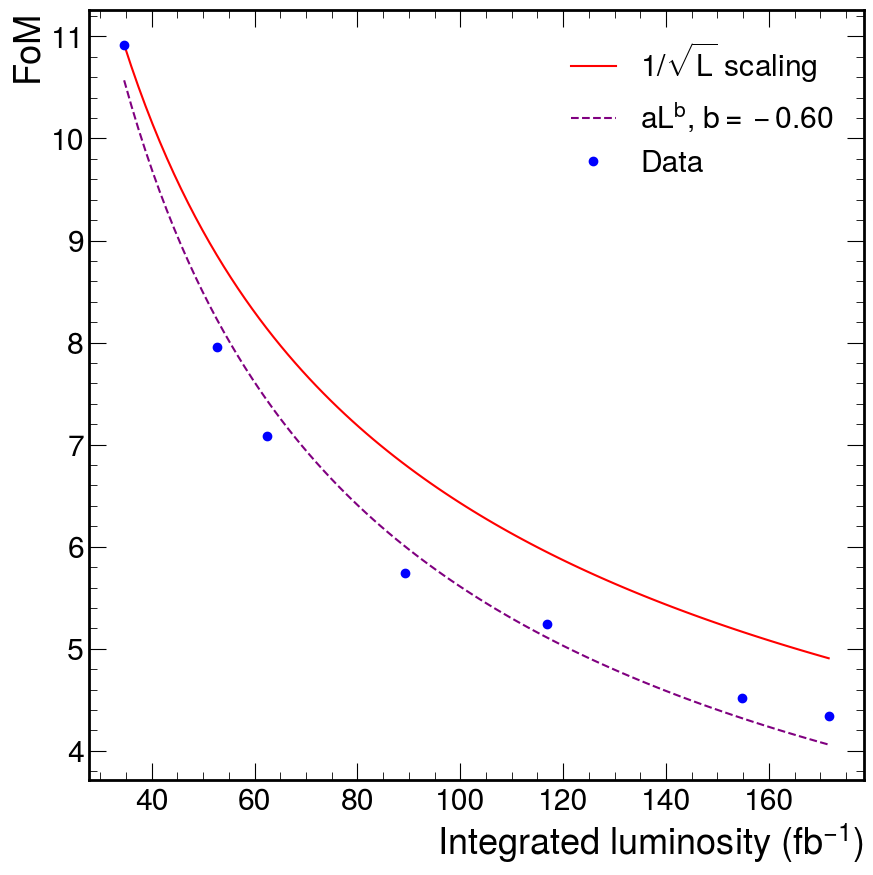

In [24]:
lumi = np.array([34.6521, 52.7365, 62.4286, 89.1886, 116.9486, 154.7186, 171.6286])
fom = np.array([10.92, 7.955, 7.082, 5.746, 5.243, 4.514, 4.345])
lumi_fine = np.linspace(lumi[0], lumi[-1], 100)
fom_sqrtlumi = fom[0] / np.sqrt(lumi_fine / lumi[0])
# fit with power law

from scipy.optimize import curve_fit


def power_law_func(x, a, b):
    return a * (x**b)


initial_guess = [63.67, -0.5]

# Fit the data
popt, pcov = curve_fit(power_law_func, lumi, fom, p0=initial_guess)

# Extract the fitted parameters
a_fit, b_fit = popt

fom_predicted = power_law_func(lumi_fine, *popt)

plt.figure()
plt.errorbar(lumi, fom, fmt="o", label="Data", color="blue", capsize=5)
plt.plot(lumi_fine, fom_sqrtlumi, label=r"$1/\sqrt{L}$ scaling", color="red", linestyle="-")
plt.plot(lumi_fine, fom_predicted, label=r"$aL^{b}$, $b=-0.60$", color="purple", linestyle="--")
plt.xlabel("Integrated luminosity (fb$^{-1}$)")
plt.ylabel("FoM")
plt.legend()

In [19]:
print(a_fit, b_fit)

88.05840755957101 -0.5979530553305061
